# Add the data + EDA

In [45]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = datasets.load_iris()

In [46]:
array = []
for data, tagret in zip(iris.data,iris.target):
    row = np.append(data, tagret)
    array.append(row)
    
array = np.array(array)
col = iris.feature_names + ["target"]
len(array), len(array[0]), col

(150,
 5,
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)',
  'target'])

In [47]:
df = pd.DataFrame(array, columns = col)

In [48]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [50]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


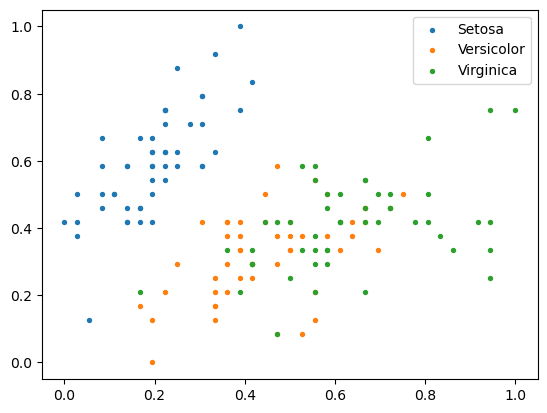

In [51]:
from sklearn.model_selection import train_test_split

SETOSA = 0
VERSICOLOR = 1
VIRGINICA = 2

X = np.array(iris["data"][:, :2], dtype=np.float64)
y = np.array(iris["target"], dtype=np.float64)
original_y = y.copy()

for i in range(X.shape[1]):
    X[:, i] = (X[:, i] - X[:, i].min()) / (X[:, i].max() - X[:, i].min())

# Create a legend by specifying labels for each class
labels = ["Setosa", "Versicolor", "Virginica"]

plt.scatter(x=X[y == SETOSA, 0], y=X[y == SETOSA, 1], label=labels[SETOSA], s=8, cmap=plt.cm.RdYlBu)
plt.scatter(x=X[y == VERSICOLOR, 0], y=X[y == VERSICOLOR, 1], label=labels[VERSICOLOR], s=8, cmap=plt.cm.RdYlBu)
plt.scatter(x=X[y == VIRGINICA, 0], y=X[y == VIRGINICA, 1], label=labels[VIRGINICA], s=8, cmap=plt.cm.RdYlBu)

plt.legend()
plt.show()

In [52]:
for i in range(y.shape[0]):  # these are either VERSICOLOR or not
    y[i] = 1.0 if y[i] == SETOSA else -1.0

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [53]:
y_train


array([-1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1., -1.,
        1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1.])

# Adaline

In [54]:

class Adaline:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.inputs = x_train
        self.targets = y_train
        
        self.x_test = x_test
        self.y_test = y_test
        
        np.random.seed(42)
        self._weights = np.random.random(self.inputs.shape[1])
        self._bias = np.random.random()
    
    def fit(self, lr=0.001, thr=0.0001, max_epochs=1000):
        self.lr = lr
        self.thr = thr
        self.losses = []
        self.test_losses = []

        for epoch in range(max_epochs):
            errors = []
            
            for i in range(self.inputs.shape[0]):
                y = np.dot(self.inputs[i], self._weights) + self._bias
                y = 1.0 if y >= 0 else -1.0

                error = 0.5 * ((self.targets[i] - y) ** 2)
                update = self.lr * (self.targets[i] - y) 
                self._weights += update * self.inputs[i]
                self._bias += update
                errors.append(error)

            loss = np.mean(errors)

            self.losses.append(loss)
            test_errors = []
            for i in range(self.x_test.shape[0]):
                unactivated_test_pred = (
                        np.dot(self._weights, self.x_test[i]) + self._bias
                    )

                test_pred = 1.0 if unactivated_test_pred >= 0 else -1.0

                test_error = 0.5 * ((self.y_test[i] - test_pred) ** 2)
                test_errors.append(test_error)
                test_loss = np.mean(test_errors)
            self.test_losses.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
            
            if loss < self.thr:
                print(f"Converged after {epoch} epochs!")
                break

        return  self.test_losses, self.losses
    
    def predict(self, test_data):
        predictions = []
        for i in range(test_data.shape[0]):
            y = np.dot(test_data[i], self._weights) + self._bias
            predictions.append(y)
        return np.array(predictions)


In [55]:
model = Adaline(x_train, y_train, x_test, y_test)
test_losses, losses = model.fit(0.001, 0.02, 25)

Epoch: 0 | Loss: 1.38 | Test Loss: 1.24
Epoch: 1 | Loss: 1.38 | Test Loss: 1.24
Epoch: 2 | Loss: 1.38 | Test Loss: 1.24
Epoch: 3 | Loss: 1.38 | Test Loss: 1.24
Epoch: 4 | Loss: 1.38 | Test Loss: 1.24
Epoch: 5 | Loss: 1.36 | Test Loss: 1.16
Epoch: 6 | Loss: 0.88 | Test Loss: 0.68
Epoch: 7 | Loss: 0.36 | Test Loss: 0.28
Epoch: 8 | Loss: 0.18 | Test Loss: 0.16
Epoch: 9 | Loss: 0.18 | Test Loss: 0.16
Epoch: 10 | Loss: 0.18 | Test Loss: 0.24
Epoch: 11 | Loss: 0.16 | Test Loss: 0.24
Epoch: 12 | Loss: 0.14 | Test Loss: 0.24
Epoch: 13 | Loss: 0.14 | Test Loss: 0.24
Epoch: 14 | Loss: 0.14 | Test Loss: 0.24
Epoch: 15 | Loss: 0.14 | Test Loss: 0.16
Epoch: 16 | Loss: 0.14 | Test Loss: 0.16
Epoch: 17 | Loss: 0.14 | Test Loss: 0.16
Epoch: 18 | Loss: 0.14 | Test Loss: 0.16
Epoch: 19 | Loss: 0.14 | Test Loss: 0.16
Epoch: 20 | Loss: 0.14 | Test Loss: 0.16
Epoch: 21 | Loss: 0.14 | Test Loss: 0.16
Epoch: 22 | Loss: 0.12 | Test Loss: 0.12
Epoch: 23 | Loss: 0.14 | Test Loss: 0.12
Epoch: 24 | Loss: 0.12 | T

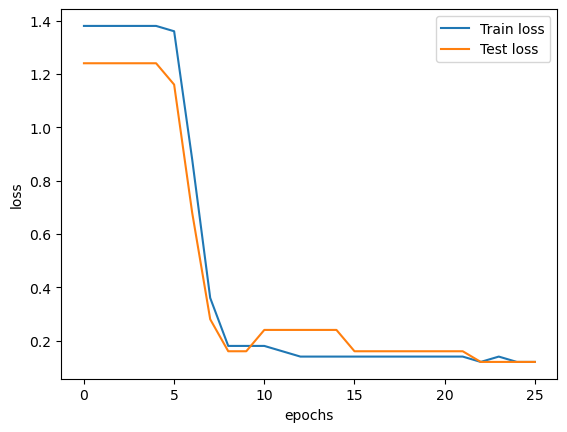

In [58]:
plt.plot(losses, label="Train loss")
plt.plot(test_losses, label="Test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()